In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../..')))

In [2]:
import numpy as np 
import scipy.fft
from operators.poisson_solver import gmres_solver
from operators.finite_difference import ddx_central, d2dx2_central, ddx_fwd
from operators.universal_functions import get_D_inv

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# Enable LaTeX rendering
matplotlib.rcParams['text.usetex'] = True

# Parameters

In [4]:
# simulation parameters
Nx = 101
Nv = 60000 # 5001
L = 20 * np.pi
v_a = -5 #-10
v_b = 15 #20
epsilon = 1e-4
k0 = 0.1
n0_e1 = 0.99
n0_e2 = 0.01
u_e1 = 0
u_e2 = 10
alpha_e1 = np.sqrt(2)
alpha_e2 = np.sqrt(2)
nu = 0
T = 120
dt = 2
t_vec = np.linspace(0, T, int(T/dt) + 1, endpoint=True)

In [5]:
# x-v space
x = np.linspace(0, L, Nx, endpoint=False)
v = np.linspace(v_a, v_b, Nv, endpoint=True)
dv = np.abs(v[1] - v[0])
dx = np.abs(x[1] - x[0])

In [6]:
# simulation operators
Dx = ddx_central(Nx=Nx+1, dx=dx, periodic=True, order=2)
Dx_inv = get_D_inv(Nx=Nx, D=Dx)

In [7]:
t_vec[-16]

90.0

# Simulation results

In [8]:
# load the simulation results
# save results
Y = np.load("/Users/oissan/PycharmProjects/mixed_methods/data/finite_difference/bump_on_tail/sol_u_Nv_" + str(Nv) + "_Nx_" + str(Nx) + "_"
         +  str(T) + ".npy")

In [9]:
np.shape(Y)

(101, 60000, 61)

In [10]:
rho = -np.sum(Y, axis=1) * dv

In [11]:
E = np.zeros((Nx, len(t_vec)))

for tt in range(len(t_vec)):
    # electric field computed (poisson solver)
    E[:, tt] = gmres_solver(rhs=rho[:, tt] - np.sum(rho[:, tt]), D=Dx, D_inv=Dx_inv, a_tol=1e-12, r_tol=1e-12)

In [12]:
np.save("/Users/oissan/PycharmProjects/mixed_methods/data/finite_difference/bump_on_tail/E_Nv_" + str(Nv) + "_Nx_" + str(Nx) + "_"
         + "_" + str(T) + ".npy", E)

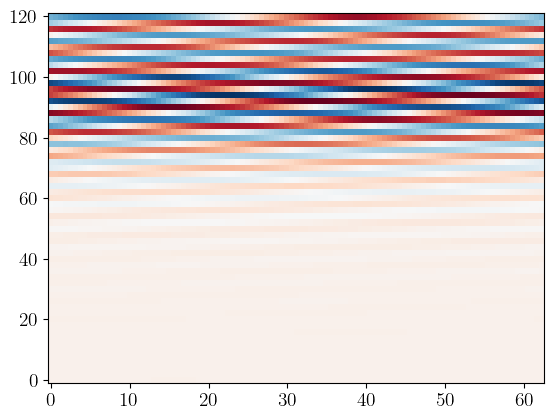

In [13]:
plt.pcolormesh(x, t_vec, E.T, cmap="RdBu")

In [14]:
Y.shape

(101, 60000, 61)

In [15]:
x = np.linspace(0, 20*np.pi, 102)
Y_new = np.zeros((len(x), len(v)))
Y_new[:-1, :] = Y[:, :, -16]
Y_new[-1, :] = Y_new[0, :]

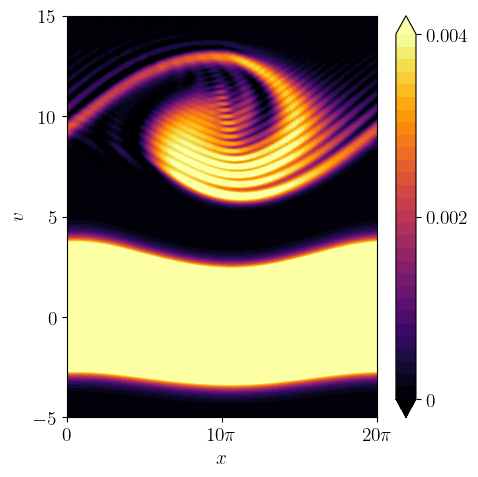

In [16]:
# plot the phase space evolution as a function of time
fig, ax = plt.subplots(figsize=(5, 5), sharex=True)


pos = ax.contourf(x, v,  Y_new.T, cmap="inferno", vmin=0, vmax=0.004, levels=np.linspace(0, 0.004, 30), extend="both")

ax.set_ylim(-5, 15)
ax.set_ylabel("$v$")
ax.set_xlabel("$x$")
cbar = fig.colorbar(pos)
cbar.set_ticks([0, 0.002, 0.004])
cbar.set_ticklabels(["0", "0.002", "0.004"])
ax.set_yticks([-5, 0, 5, 10, 15])
ax.set_xticks([0, 10*np.pi, 20*np.pi])
ax.set_xticklabels([r"0", r"$10\pi$", r"$20\pi$"])
plt.tight_layout()
plt.savefig("../../figures/finite_difference/bump_on_tail_phase_space_FD_t_90_Nv_" + str(Nv) + ".png", dpi=300)